### Recurrent Neural Networks

Majority of the networks seen until now only worked on current input and did not take into account the previous inputs effect. (Or in other words the Networks did not have any memory). 

So, to train on temporal data all the data would have to been shown to the network at one. Like we did for IMDB data. These were feedforward dense networks. 

Whereas a RNN ,would have a memory of what has been seen till now and would process the sentences word by word rather than looking at the entire sentence at once. This is done by maintaining a state information which is related to what has been seen by the network till now. 

So, the data datapoint still remains the entire sentence but the network would now process the sentence word by word. 

So to understand the working of RNN better let us try to understand working using the basic psuedo code.

```python
state_t = 0 
for input_t in input_sequence:
    output_t = activation(dot(W,input_t) + dot(U,state_t) + b)
    state_t = output_t
```


Here the input to the network is a 2D tensor whose dimensions are (timesteps, input_features). The RNN loops over all the timesteps and updates the value for the state at each timestamp and also outputs something based on what it has seen till then. 

In the above model the model decides the output based on the previous state, and current input.


***THis is the Numpy implementation of simple RNN***

In [9]:
import numpy as np 

timesteps = 100
input_features = 32
output_features = 64


inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W,input_t) + np.dot(U,state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

---------

***RNN In Keras***

------

The last implementation corresponds to the SimpleRNN available in Keras. With the same activation function and functionality. One small differnce is that that the SimpleRNN processes batches.

**Inputs:** : (batch_size, timesteps, input_features)
**Output:** : (batch_size, timesteps, output_features) or (batch_size, output_features)

The above two can be set using the return_sequences constructor argument of SimpleRNN. In the second case the Model only outputs the final prediction rather than predictions at all timesteps. 


In [10]:
from keras.models import Sequential
from keras .layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Sometimes it is beneficial to stack multiple RNN cells together. For that it is necessary to return the value of all the timestamps. 

In [16]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


----------

***SimpleRNN on IMDB Dataset***


----------

In [18]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500 
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

In [19]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [21]:
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 851us/step - loss: 0.6479 - acc: 0.6083 - val_loss: 0.5084 - val_acc: 0.7822
Epoch 2/10
20000/20000 [==============================] - 15s 769us/step - loss: 0.4207 - acc: 0.8192 - val_loss: 0.3954 - val_acc: 0.8318
Epoch 3/10
20000/20000 [==============================] - 15s 762us/step - loss: 0.3032 - acc: 0.8760 - val_loss: 0.3679 - val_acc: 0.8320
Epoch 4/10
20000/20000 [==============================] - 15s 756us/step - loss: 0.2290 - acc: 0.9113 - val_loss: 0.3958 - val_acc: 0.8456
Epoch 5/10
20000/20000 [==============================] - 15s 755us/step - loss: 0.1826 - acc: 0.9297 - val_loss: 0.4051 - val_acc: 0.8590
Epoch 6/10
20000/20000 [==============================] - 15s 759us/step - loss: 0.1289 - acc: 0.9557 - val_loss: 0.4026 - val_acc: 0.8490
Epoch 7/10
20000/20000 [==============================] - 15s 760us/step - loss: 0.0893 - acc: 0.9698 - val_loss: 0.5

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

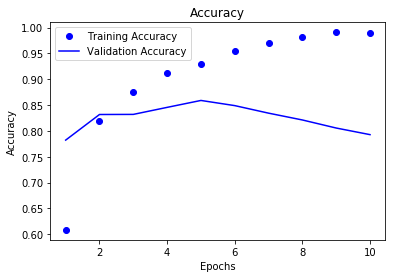

In [24]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

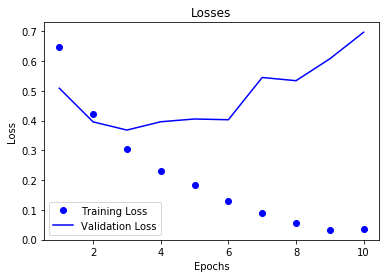

In [25]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')


plt.title('Losses')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The model performance is not well compared to the Dense Model which we used in the Chapter 3. The two important reasons for that are - 

1. SimpleRNN does not perform very well for text data. There are other RNN's available which perform data. 
2. We clipped the sequences at 500, this also caused the loss of data. 

***Drawbacks of SimpleRNN***

The simple RNN suffers from ***vanishing gradient problem***. As we move across the timesteps the model forgets the old timestamps. This is because during backpropogation the gradient while backpropogation becomes so small that it is not able to update the weights. 

To tackle this issue two varients of RNN were introduces, ***GRU's and LSTM.***

------
***Understanding LSTM's***

------
The following is the LSTM archtitecture. For understanding the LSTM front propogation and Backpropogation. Follow the following Blogs - 

http://arunmallya.github.io/writeups/nn/lstm/index.html#/ - Arun Mallya Github.io Blog}
http://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Colah's Blog}
https://arxiv.org/pdf/1610.02583.pdf - A Gentle Tutorial of Recurrent Neural Network with Error Backpropagation}

<img src="LSTM.png">


The LSTMs main goal was to tackle the vanishing gradient problem. This is solved as there are two paths by which the gradients flow. One path the gradient flow is continous as there are no functions. 

It allows better information flow from previous layers to next layers. The details of proper working can be seen  at the above blogs. 


------

***LSTM in Keras***

--------

In [30]:
from keras.layers import LSTM

In [31]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1,activation = 'sigmoid'))



In [35]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])


In [36]:
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.5100 - acc: 0.7616 - val_loss: 0.3657 - val_acc: 0.8388
Epoch 2/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2900 - acc: 0.8860 - val_loss: 0.3579 - val_acc: 0.8428
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2317 - acc: 0.9101 - val_loss: 0.3538 - val_acc: 0.8836
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1933 - acc: 0.9275 - val_loss: 0.5599 - val_acc: 0.8286
Epoch 5/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1734 - acc: 0.9365 - val_loss: 0.2933 - val_acc: 0.8784
Epoch 6/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1548 - acc: 0.9432 - val_loss: 0.5077 - val_acc: 0.8492
Epoch 7/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1429 - acc: 0.9485 - val_loss: 0.3594 - val_acc:

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

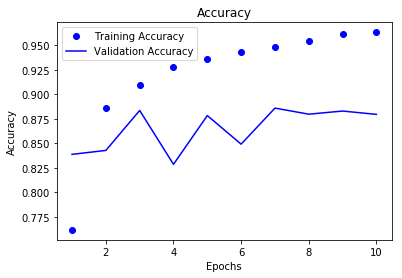

In [38]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

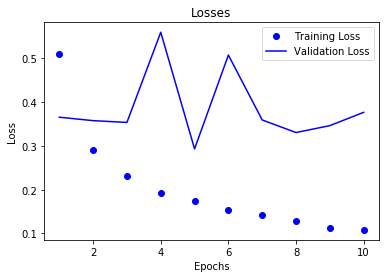

In [39]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')


plt.title('Losses')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

***Analyzing the model performance***

1. The results even though better than SimpleRNN still are close to the performance of the Dense Neural Network. 
2. The first reason is that thhe hyperparameters of the model have not been tuned. 
3. No dropouts, or Embedding matrix dimensionality has been experimented with. 
4. For problems like sentiment analysis, the crude Dense layer models look at the occurence of terms rather than the sentence structure which works decently well for sentiment analysis problem.